# NYC Flights 2013 Analysis
By: Arhym

Last update: Oct 9, 2022

### Preparations

In [1]:
install.packages("nycflights13")
library(nycflights13)
library("tidyverse")
library(dplyr, warn.conflicts = FALSE)
options(dplyr.summarise.inform = FALSE)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Warning message:
“Failed to locate timezone database”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



In [2]:
data(package="nycflights13")

Package,Item,Title
<chr>,<chr>,<chr>
nycflights13,airlines,Airline names.
nycflights13,airports,Airport metadata
nycflights13,flights,Flights data
nycflights13,planes,Plane metadata.
nycflights13,weather,Hourly weather data


In [3]:
glimpse(flights)

Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

In [4]:
glimpse(weather)

Rows: 26,115
Columns: 15
$ origin     <chr> "EWR", "EWR", "EWR", "EWR", "EWR", "EWR", "EWR", "EWR", "EW…
$ year       <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,…
$ month      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ day        <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ hour       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, …
$ temp       <dbl> 39.02, 39.02, 39.02, 39.92, 39.02, 37.94, 39.02, 39.92, 39.…
$ dewp       <dbl> 26.06, 26.96, 28.04, 28.04, 28.04, 28.04, 28.04, 28.04, 28.…
$ humid      <dbl> 59.37, 61.63, 64.43, 62.21, 64.43, 67.21, 64.43, 62.21, 62.…
$ wind_dir   <dbl> 270, 250, 240, 250, 260, 240, 240, 250, 260, 260, 260, 330,…
$ wind_speed <dbl> 10.35702, 8.05546, 11.50780, 12.65858, 12.65858, 11.50780, …
$ wind_gust  <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, 20.…
$ precip     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ pressure   <d

In [5]:
glimpse(airports)

Rows: 1,458
Columns: 8
$ faa   <chr> "04G", "06A", "06C", "06N", "09J", "0A9", "0G6", "0G7", "0P2", "…
$ name  <chr> "Lansdowne Airport", "Moton Field Municipal Airport", "Schaumbur…
$ lat   <dbl> 41.13047, 32.46057, 41.98934, 41.43191, 31.07447, 36.37122, 41.4…
$ lon   <dbl> -80.61958, -85.68003, -88.10124, -74.39156, -81.42778, -82.17342…
$ alt   <dbl> 1044, 264, 801, 523, 11, 1593, 730, 492, 1000, 108, 409, 875, 10…
$ tz    <dbl> -5, -6, -6, -5, -5, -5, -5, -5, -5, -8, -5, -6, -5, -5, -5, -5, …
$ dst   <chr> "A", "A", "A", "A", "A", "A", "A", "A", "U", "A", "A", "U", "A",…
$ tzone <chr> "America/New_York", "America/Chicago", "America/Chicago", "Ameri…


In [6]:
glimpse(airlines)

Rows: 16
Columns: 2
$ carrier <chr> "9E", "AA", "AS", "B6", "DL", "EV", "F9", "FL", "HA", "MQ", "O…
$ name    <chr> "Endeavor Air Inc.", "American Airlines Inc.", "Alaska Airline…


## Questions 1 
## 1.1 Did each season have the same amount of flights? 
- Spring (March-May)
- Summer (June-August)
- Autumn (September-November)
- Winter (December-February)

## 1.2 How was the flight status by season?
- Arrived within 15 minutes is considered "on time"
- Arrived later than 15 minutes is considered "delayed"

### Answer
- Spring and Summer had roughly the same number of flights.
- Winter had the lowest number of flights with the highest number of cancelled flights.
- Autumn was the best time to travel as it had the highest number of on-time flights, the lowest number of delayed and cancelled flights.

In [7]:
# transform data
fs1 <- flights %>%
  select(carrier, month, dep_delay, arr_delay, flight, origin, dest, air_time, distance) %>%
  mutate(season = case_when(
      month == 3 ~ "spring",
      month == 4 ~ "spring",
      month == 5 ~ "spring",
      month == 6 ~ "summer",
      month == 7 ~ "summer",
      month == 8 ~ "summer",
      month == 9 ~ "autumn",
      month == 10 ~ "autumn",
      month == 11 ~ "autumn",
      month == 12 ~ "winter",
      month == 1 ~ "winter",
      month == 2 ~ "winter"),
    arrdelay_group = case_when(
      arr_delay <= 15 ~ "on time",
      arr_delay > 15  ~ "delayed",
      TRUE ~ "cancelled")
    )

In [8]:
fs1 %>%
count(season)

season,n
<chr>,<int>
autumn,83731
spring,85960
summer,86995
winter,80090


season,arrdelay_group,n
<chr>,<chr>,<int>
autumn,cancelled,1132
autumn,delayed,13053
autumn,on time,69546
spring,cancelled,2366
spring,delayed,20252
spring,on time,63342
summer,cancelled,2871
summer,delayed,24094
summer,on time,60030


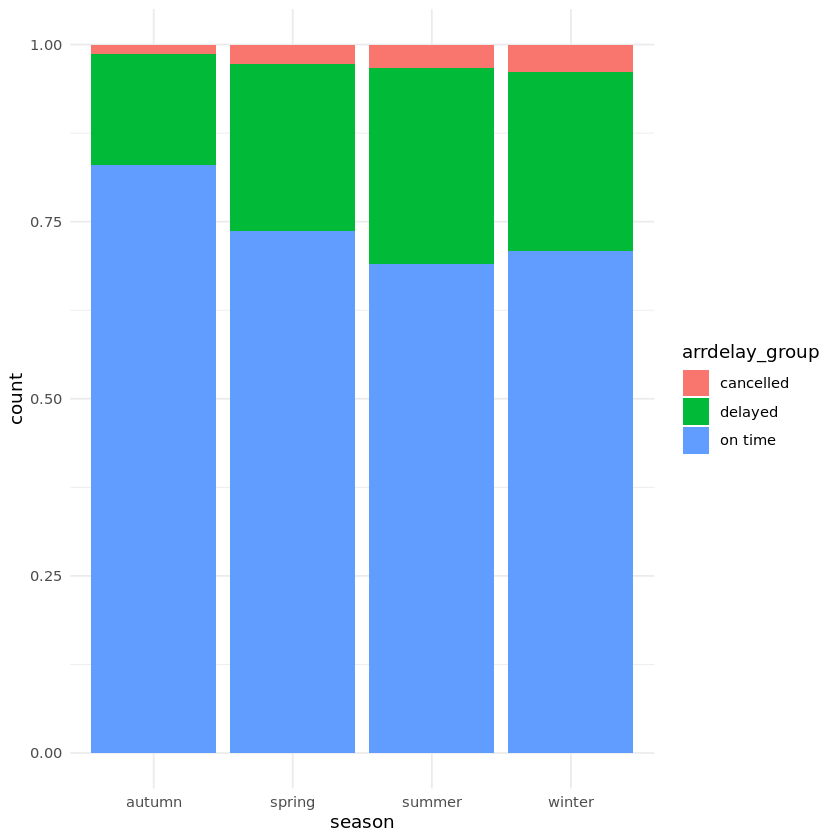

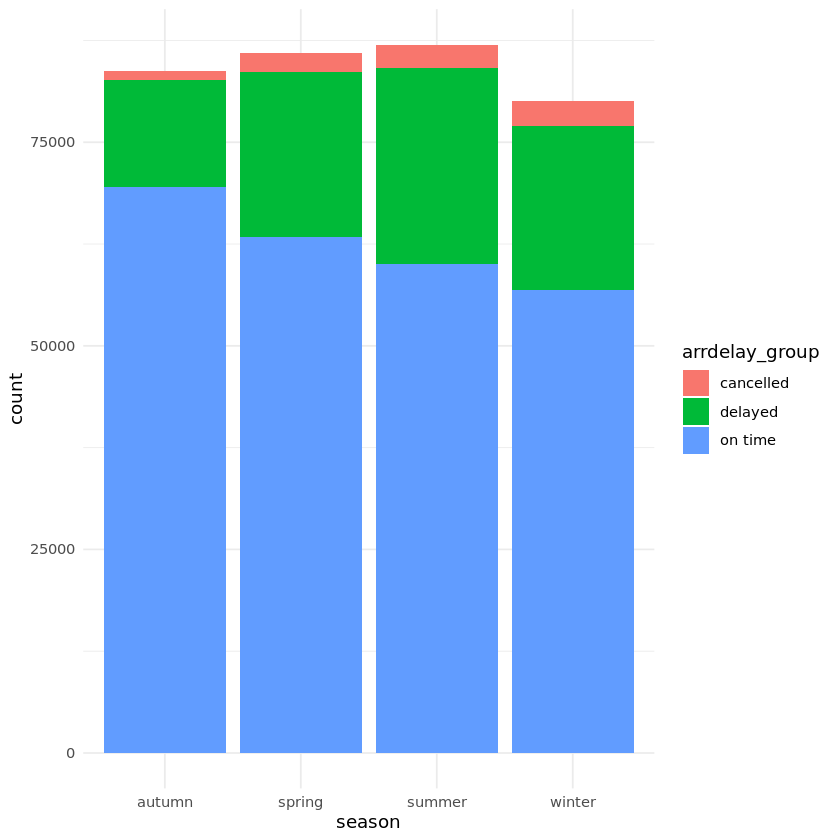

In [9]:
fs1 %>%
  group_by(season) %>%
  count(arrdelay_group)

#visualization 1
ggplot(fs1, aes(season, fill = arrdelay_group)) +
  geom_bar(position = "fill") + theme_minimal()

#visualization 2
ggplot(fs1, aes(season, fill = arrdelay_group)) +
  geom_bar() + theme_minimal()

## Question 2
## What were the top 3 destinations that people visited in each season in 2013?

### Answer
**Top 3 destinations in 2013**
- Chicago Ohare Intl airport
- Hartsfield Jackson Atlanta Intl airport
- Los Angeles Intl airport

    **The ranking varied by season:**
    - Chicago was ranked as the top destination in Autumn.
    - Atlanta was ranked as the top destination in Spring and Winter.
    - In Summer, the number of flights to these three destinations was almost the same.

In [10]:
#transform data
airportname <- airports %>%
  select(faa, name)

top3spring <- fs1 %>%
  filter(arrdelay_group != "cancelled") %>%
  group_by(season) %>%
  filter(season == "spring") %>%
  count(dest) %>%
  arrange(desc(n)) %>%
  left_join(airportname, by = c("dest" = "faa")) %>%
  head(3)

top3summer <- fs1 %>%
  filter(arrdelay_group != "cancelled") %>%
  group_by(season) %>%
  filter(season == "summer") %>%
  count(dest) %>%
  arrange(desc(n)) %>%
  left_join(airportname, by = c("dest" = "faa")) %>%
  head(3)


top3autumn <- fs1 %>%
  filter(arrdelay_group != "cancelled") %>%
  group_by(season) %>%
  filter(season == "autumn") %>%
  count(dest) %>%
  arrange(desc(n)) %>%
  left_join(airportname, by = c("dest" = "faa")) %>%
  head(3)

top3winter <- fs1 %>%
  filter(arrdelay_group != "cancelled") %>%
  group_by(season) %>%
  filter(season == "winter") %>%
  count(dest) %>%
  arrange(desc(n)) %>%
  left_join(airportname, by = c("dest" = "faa")) %>%
  head(3)

In [11]:
#full join
top3all <- full_join(x = top3spring, y = top3summer, by = NULL)
top3all <- full_join(x = top3all, y = top3autumn, by = NULL)
top3all <- full_join(x = top3all, y = top3winter, by = NULL)

Joining, by = c("season", "dest", "n", "name")

Joining, by = c("season", "dest", "n", "name")

Joining, by = c("season", "dest", "n", "name")



In [12]:
top3all %>% group_by(name)

season,dest,n,name
<chr>,<chr>,<int>,<chr>
spring,ATL,4339,Hartsfield Jackson Atlanta Intl
spring,ORD,4144,Chicago Ohare Intl
spring,LAX,3985,Los Angeles Intl
summer,ORD,4499,Chicago Ohare Intl
summer,LAX,4417,Los Angeles Intl
summer,ATL,4317,Hartsfield Jackson Atlanta Intl
autumn,ORD,4444,Chicago Ohare Intl
autumn,ATL,4172,Hartsfield Jackson Atlanta Intl
autumn,LAX,4093,Los Angeles Intl


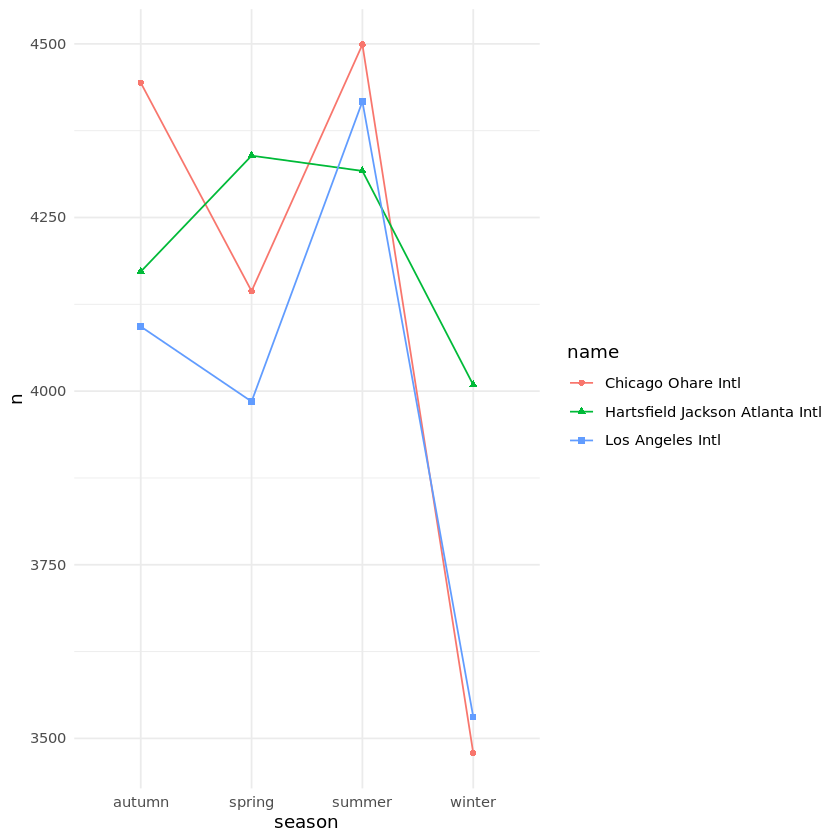

In [13]:
#visualization 
ggplot(top3all, aes(season,n,group = name, colour=name, shape=name)) +
  geom_point() + geom_line() + theme_minimal()

## Question 3
## 3.1 How many airports in NYC?
## 3.2 Did airport in NYC have the same amount of flights provided?

### Answer
**There are 3 airports in NYC. All of which provide about the same total amount of flights in 2013.**
  * Newark Liberty Intl airport (EWR) - provided the largest number of flights in 2013.
  * John F Kennedy Intl airport (JFK)- had the furthest average mean flight distance.
  * La Guardia airport (LGA) - provided shorter distance route than the other two airports.

In [14]:
airportname <- airports %>%
  select(faa, name)

nycairport <- flights %>%
group_by(origin) %>%
    summarise(mean_distance = mean(distance),
            flights = n()) %>%
left_join(airportname, by = c("origin" = "faa"))

nycairport

origin,mean_distance,flights,name
<chr>,<dbl>,<int>,<chr>
EWR,1056.7428,120835,Newark Liberty Intl
JFK,1266.2491,111279,John F Kennedy Intl
LGA,779.8357,104662,La Guardia


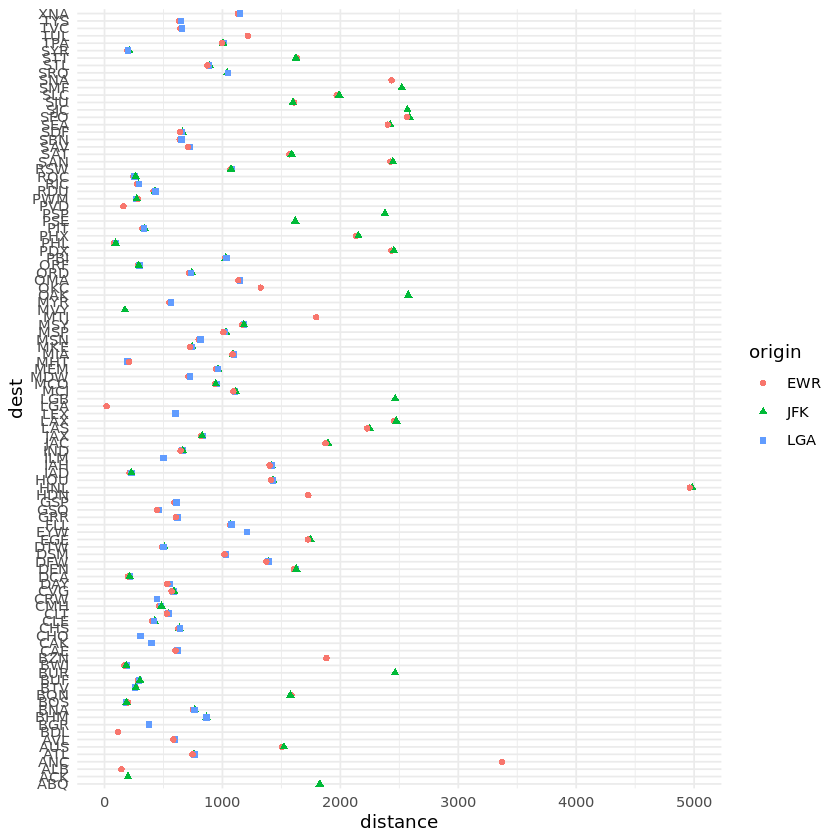

In [15]:
#visualization
ggplot(flights, aes(distance,dest,group = origin, colour=origin, shape=origin)) +
  geom_point() + theme_minimal()

## Question 4 
## What was the furthest flight that you could fly from La Guardia airport and by which carrier?

### Answer
**A flight to Denver Intl airport (DEN) by one of these 4 carriers**: 
- United Air Lines (UA)
-  Southwest Airlines(WN)
- Frontier Airlines (F9)
-  Delta Air Lines (DL)
  
  **Other findings:**
 - 1620 miles was the furthest destination you could fly from La Guardia airport.
- 44% of the flights from La Guardia airport to Denver Intl airport were operated by United Air Lines.

  

In [16]:
flights %>%
select(origin, dest, distance) %>%
filter(origin == "LGA") %>%
left_join(airportname, by = c("dest" = "faa")) %>%
arrange(desc(distance)) %>%
head(1)


origin,dest,distance,name
<chr>,<chr>,<dbl>,<chr>
LGA,DEN,1620,Denver Intl


In [17]:
DEN <- flights %>%
select(origin, dest, distance, carrier) %>%
filter(origin == "LGA") %>%
filter(distance == 1620) %>% 
count(carrier) %>%
arrange(desc(n)) %>%
left_join(airlines,"carrier")

DEN

carrier,n,name
<chr>,<int>,<chr>
UA,1626,United Air Lines Inc.
WN,715,Southwest Airlines Co.
F9,685,Frontier Airlines Inc.
DL,678,Delta Air Lines Inc.


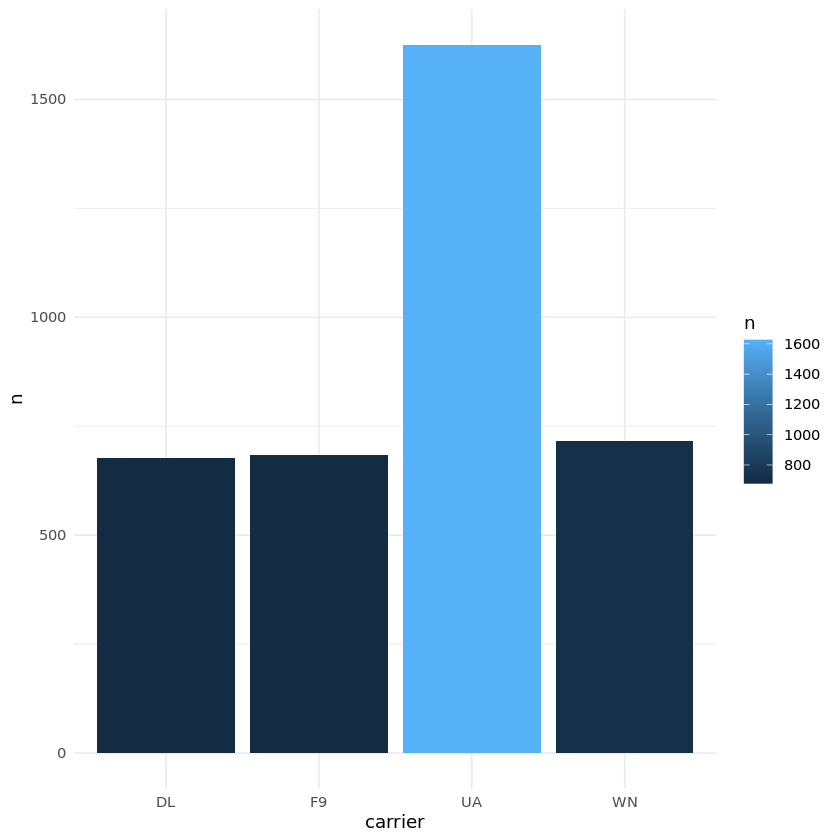

In [18]:
#visualization
ggplot(DEN, aes(carrier,n,fill=n)) +
  geom_col() + theme_minimal()

## Question 5
## Which carrier dominated the NYC airport?

## Answer
**There were 5 main carriers that dominated 74% of the flights from NYC airports**
- United Air Lines (UA)
- JetBlue Airways (B6)
- ExpressJet Airlines (EV)
- Delta Air Lines (DL)
- American Airlines (AA)

    **Other findings:**
    * United Air Lines (UA) and ExpressJet Airlines (EV) dominated 75% of the flights from Newark   Liberty Intl airport (EWR).
    * JetBlue Airways dominated 38% of the flights from John F Kennedy Intl airport (JFK).
    * There was no obvious carrier domination in La Guardia airport (LGA).

In [19]:
nycairport

nycairport %>% summarise(total_nycflights = sum(flights))

origin,mean_distance,flights,name
<chr>,<dbl>,<int>,<chr>
EWR,1056.7428,120835,Newark Liberty Intl
JFK,1266.2491,111279,John F Kennedy Intl
LGA,779.8357,104662,La Guardia


total_nycflights
<int>
336776


In [20]:
flights %>%
group_by(carrier) %>%
count(carrier) %>%
arrange(desc(n)) %>%
head(5) %>%
left_join(airlines,"carrier")

carrier,n,name
<chr>,<int>,<chr>
UA,58665,United Air Lines Inc.
B6,54635,JetBlue Airways
EV,54173,ExpressJet Airlines Inc.
DL,48110,Delta Air Lines Inc.
AA,32729,American Airlines Inc.


origin,carrier,n
<chr>,<chr>,<int>
EWR,AA,3487
EWR,B6,6557
EWR,DL,4342
EWR,EV,43939
EWR,UA,46087
JFK,AA,13783
JFK,B6,42076
JFK,DL,20701
JFK,EV,1408


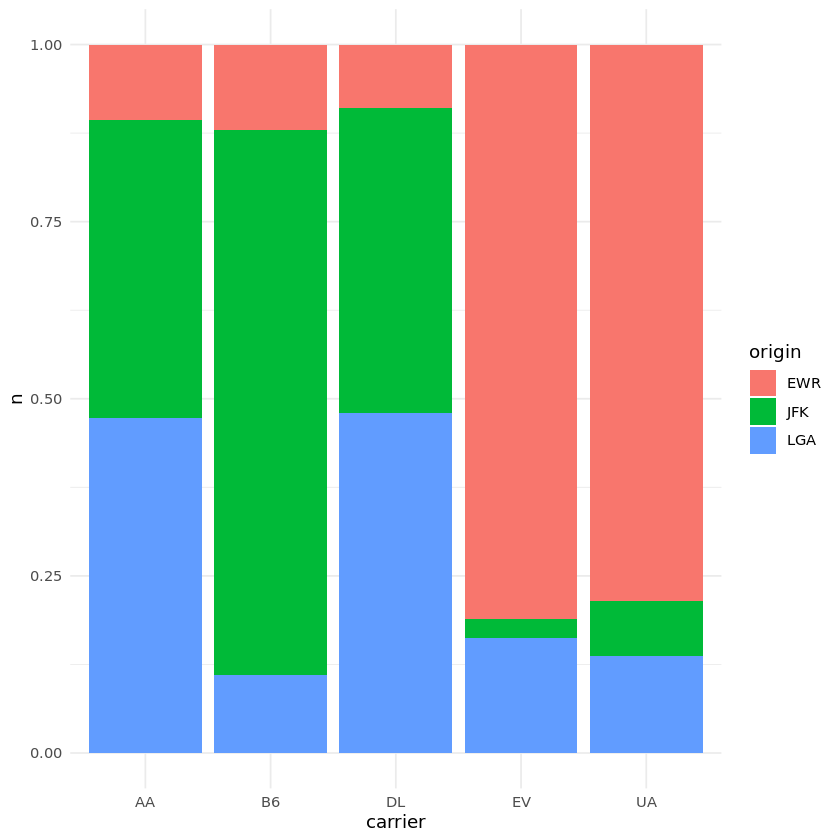

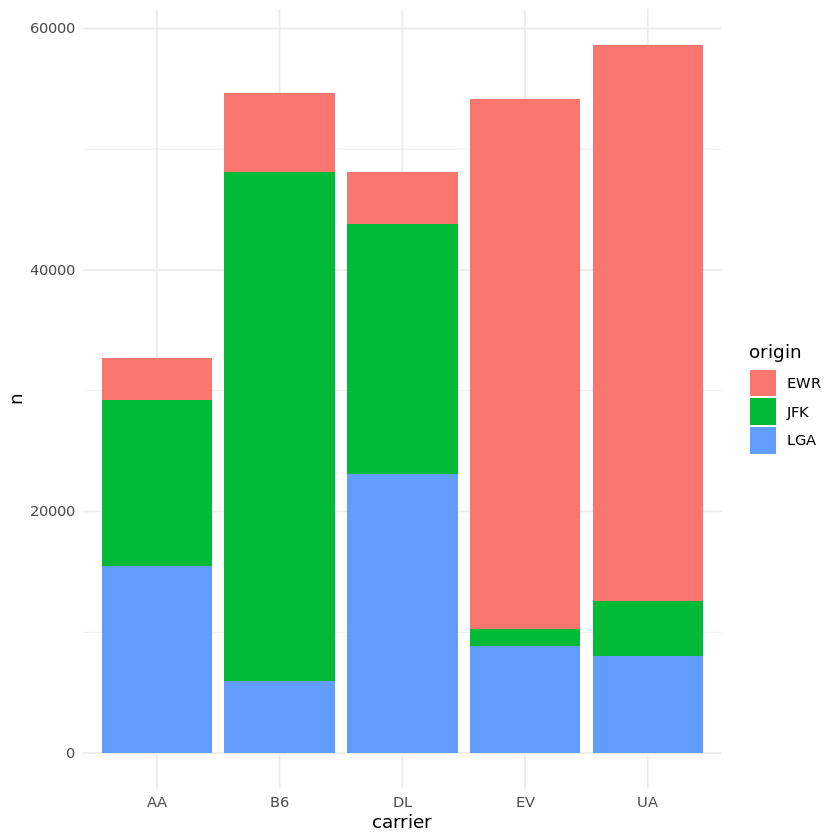

In [21]:
topcarrier <- flights %>%
select(origin, carrier) %>%
group_by(origin) %>%
count(carrier) %>%
filter(carrier == "UA" |
        carrier == "B6"|
        carrier == "EV"|
        carrier == "DL"|
        carrier == "AA"
        )

topcarrier

#visualization 1
ggplot(topcarrier, aes(carrier, n, fill = origin)) +
 geom_col(position = "fill") + theme_minimal()

#visualization 2
ggplot(topcarrier, aes(carrier, n, fill = origin)) +
 geom_col() + theme_minimal()

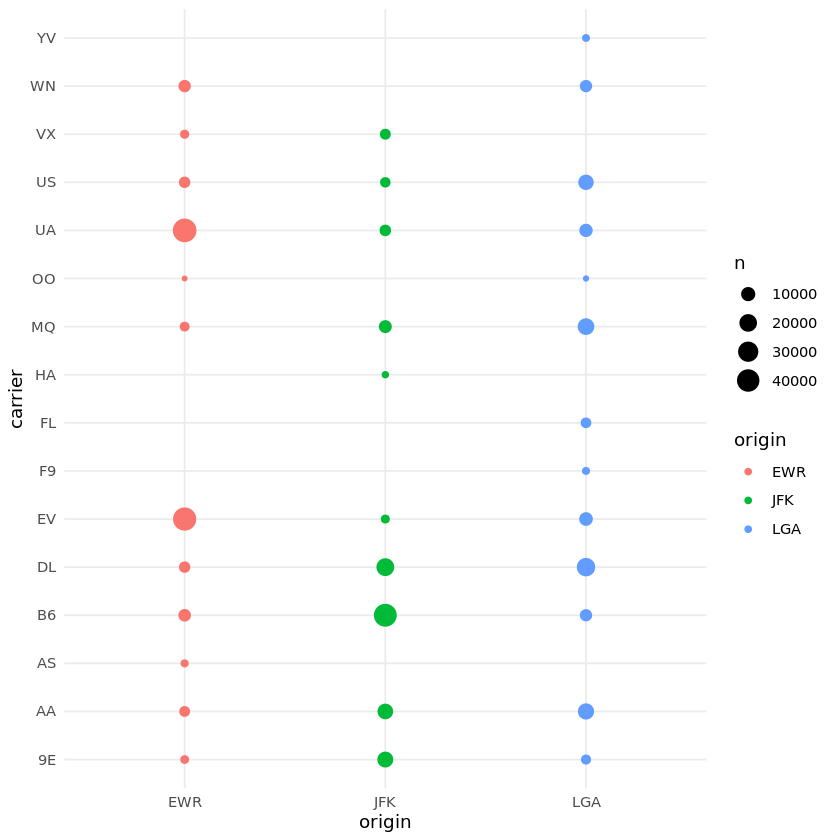

In [22]:
apcarrier <- flights %>%
select(origin, carrier) %>%
group_by(origin) %>%
count(carrier)

#visualization
ggplot(apcarrier, aes(origin,carrier,color = origin, size = n)) +
 geom_point() + theme_minimal()

dest,origin,carrier,n
<chr>,<chr>,<chr>,<int>
ABQ,JFK,B6,254
ACK,JFK,B6,265
ALB,EWR,EV,439
ANC,EWR,UA,8
ATL,EWR,9E,4
ATL,EWR,DL,3153
ATL,EWR,EV,1762
ATL,EWR,UA,103
ATL,JFK,9E,55


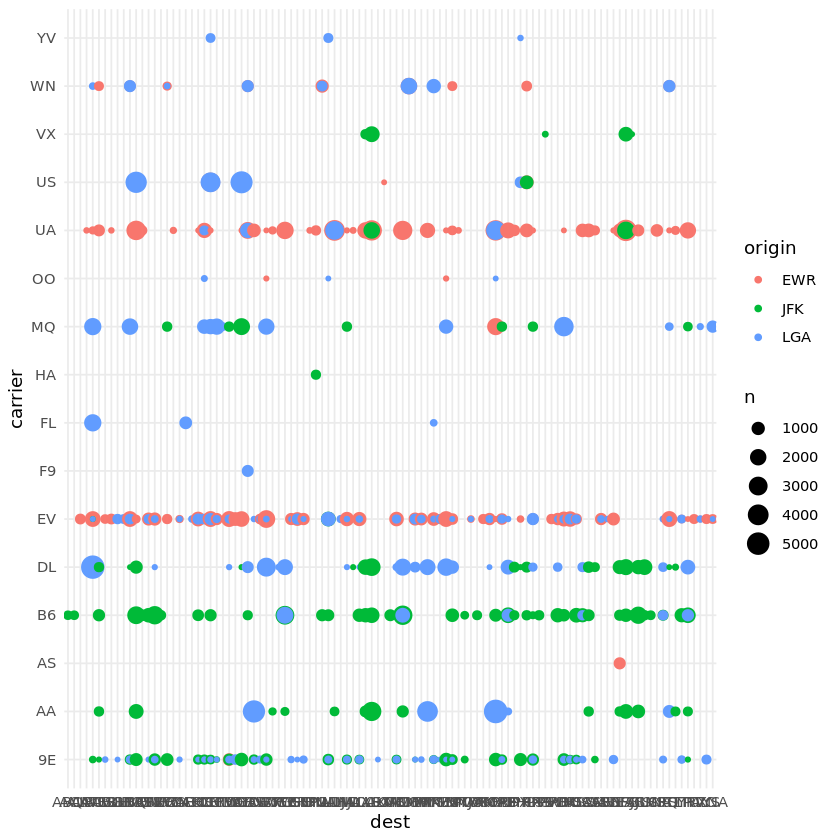

In [23]:
descarrier <- flights %>%
select(carrier, dest, origin) %>%
group_by(dest,origin) %>%
count(carrier)

descarrier

ggplot(descarrier, aes(dest,carrier,color = origin, size = n)) +
 geom_point() + theme_minimal()